<a href="https://colab.research.google.com/github/Gail529/chess_ML/blob/main/trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.5MB/s 


In [77]:
#required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import warnings
import category_encoders as ce
from category_encoders.hashing import HashingEncoder
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)



In [99]:
data=pd.read_csv('/content/games.csv',usecols=['rated','turns','victory_status','winner','white_rating','black_rating','opening_ply','opening_eco','increment_code'])
data.head()

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply
0,False,13,outoftime,white,15+2,1500,1191,D10,5
1,True,16,resign,black,5+10,1322,1261,B00,4
2,True,61,mate,white,5+10,1496,1500,C20,3
3,True,61,mate,white,20+0,1439,1454,D02,3
4,True,95,mate,white,30+3,1523,1469,C41,5


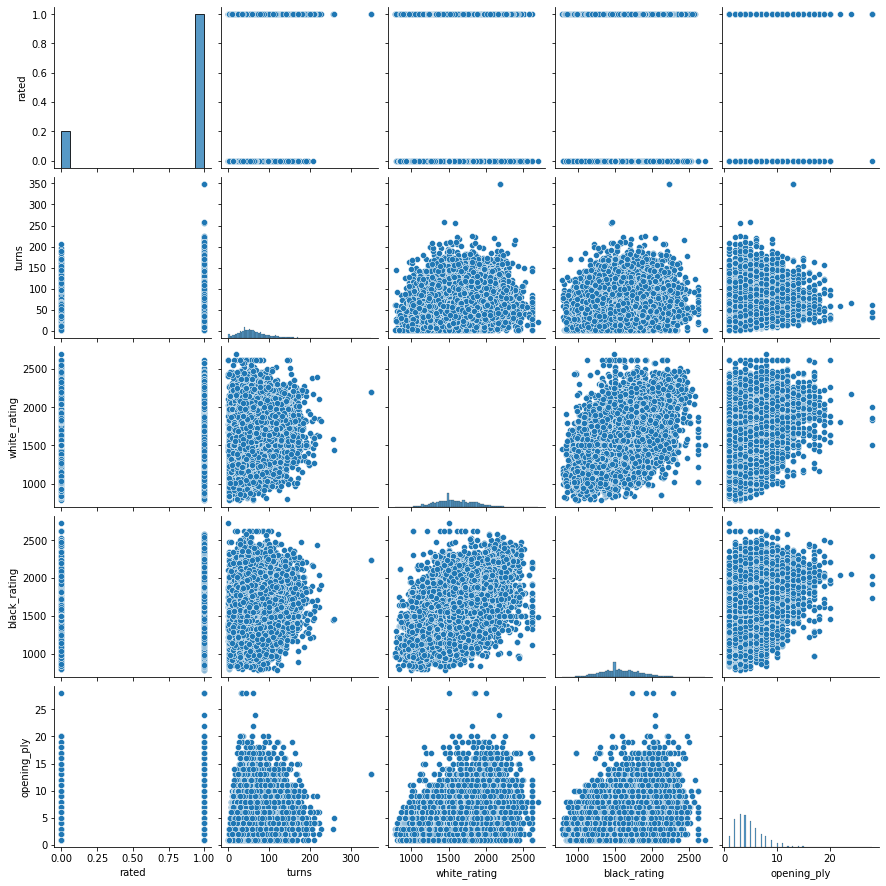

In [90]:
sns.pairplot(data)

In [100]:
#creating a new feature
data['rating_diff'] = data['white_rating']-data['black_rating']
data.columns


Index(['rated', 'turns', 'victory_status', 'winner', 'increment_code',
       'white_rating', 'black_rating', 'opening_eco', 'opening_ply',
       'rating_diff'],
      dtype='object')

In [101]:
data.isnull().sum().sum()
data.dropna(axis=0,inplace=True)

In [102]:
#standardisation
from sklearn import preprocessing 
cols=['turns','white_rating', 'black_rating', 'opening_ply','rating_diff']
cols_to_scale=data[cols]
Standardisation = preprocessing.StandardScaler()  
scaled_cols= Standardisation.fit_transform(cols_to_scale) 
print ("\nStandardised columns : \n", scaled_cols) 
data[cols]=scaled_cols



Standardised columns : 
 [[-1.4139516  -0.33178766 -1.36698461  0.0654322   1.20949108]
 [-1.32458542 -0.94295461 -1.12645864 -0.29208323  0.21362897]
 [ 0.01590722 -0.34552175 -0.30523428 -0.64959865 -0.04738328]
 ...
 [-0.75859964 -1.2966074  -1.04055651 -0.64959865 -0.30036438]
 [ 1.44576604 -0.81248077 -1.24328554 -0.29208323  0.50275023]
 [ 0.52231555 -1.24167104 -0.858444   -0.64959865 -0.44894059]]


In [112]:
# label encoding the data 
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
print(categorical_cols)
le = LabelEncoder() 
data['winner']= le.fit_transform(data['winner'])
data['rated']= le.fit_transform(data['rated'])
data['victory_status']= le.fit_transform(data['rated'])

#for categorical_cols with high cardinality
#binary encoding
encoder= ce.BinaryEncoder(cols=['opening_eco','increment_code'])
data_encoded=encoder.fit_transform(data) 

#hash encoding






[]


,rated,turns,victory_status,winner,increment_code_0,increment_code_1,increment_code_2,increment_code_3,increment_code_4,increment_code_5,increment_code_6,increment_code_7,increment_code_8,increment_code_9,white_rating,black_rating,opening_eco_0,opening_eco_1,opening_eco_2,opening_eco_3,opening_eco_4,opening_eco_5,opening_eco_6,opening_eco_7,opening_eco_8,opening_eco_9,opening_ply,rating_diff
0,0,-1.413952,0,2,0,0,0,0,0,0,0,0,0,1,-0.331788,-1.366985,0,0,0,0,0,0,0,0,0,1,0.065432,1.209491
1,1,-1.324585,1,0,0,0,0,0,0,0,0,0,1,0,-0.942955,-1.126459,0,0,0,0,0,0,0,0,1,0,-0.292083,0.213629
2,1,0.015907,1,2,0,0,0,0,0,0,0,0,1,0,-0.345522,-0.305234,0,0,0,0,0,0,0,0,1,1,-0.649599,-0.047383
3,1,0.015907,1,2,0,0,0,0,0,0,0,0,1,1,-0.541233,-0.463294,0,0,0,0,0,0,0,1,0,0,-0.649599,-0.091555
4,1,1.028724,1,2,0,0,0,0,0,0,0,1,0,0,-0.252817,-0.411753,0,0,0,0,0,0,0,1,0,1,0.065432,0.185520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,1,-1.086276,1,2,0,0,0,0,0,1,0,0,0,0,0.324015,-1.267338,0,0,0,0,1,0,0,0,0,0,-1.007114,1.860014
20054,1,0.641470,1,0,0,0,0,0,0,0,0,1,0,1,-1.248538,-1.349804,0,0,0,0,1,0,0,1,1,0,-1.007114,0.117255
20055,1,-0.758600,1,2,0,0,0,0,0,0,0,1,0,1,-1.296607,-1.040557,0,0,0,0,0,0,0,1,1,1,-0.649599,-0.300364
20056,1,1.445766,1,2,0,0,0,0,0,0,0,1,0,1,-0.812481,-1.243286,0,0,0,1,0,1,1,0,1,0,-0.292083,0.502750


In [113]:
X = data_encoded.drop(columns=['winner'], axis=1)
y = data_encoded['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [103]:
# label encoding the data 
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
print(categorical_cols)
le = LabelEncoder() 
data['winner']= le.fit_transform(data['winner'])
data['rated']= le.fit_transform(data['rated'])
data['victory_status']= le.fit_transform(data['rated'])


#for categorical_cols with high cardinality
encoder= ce.BinaryEncoder(cols=['opening_eco','increment_code'])
data_encoded=encoder.fit_transform(data) 


['victory_status', 'winner', 'increment_code', 'opening_eco']


In [105]:
X = data.drop(columns=['winner'], axis=1)
y = data['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [107]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=13,criterion='gini')
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",clf.score(X_test, y_test))
print("Accuracy:",clf.score(X_train, y_train))

#print('Training accuracy: ',model.score(X_train,y_train))
#print('Test Accuracy: ',model.score(X_test,y_test))


Accuracy: 0.6405782652043869
Accuracy: 0.7188707466035149


In [108]:
max_depth = [1,2,3,4,5,6,7,8,9,10]
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for val in max_depth:
    score = cross_val_score(DecisionTreeClassifier(max_depth= val, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(1): 0.613
Average score(2): 0.613
Average score(3): 0.614
Average score(4): 0.625
Average score(5): 0.625
Average score(6): 0.627
Average score(7): 0.628
Average score(8): 0.632
Average score(9): 0.633
Average score(10): 0.634


In [66]:
import numpy as np
def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(1, 15)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

dtree_grid_search(X,y,10)

{'criterion': 'entropy', 'max_depth': 13}

In [68]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.6321036889332003
              precision    recall  f1-score   support

           0       0.65      0.55      0.60      1816
           1       0.14      0.06      0.08       192
           2       0.64      0.76      0.69      2004

    accuracy                           0.63      4012
   macro avg       0.48      0.46      0.46      4012
weighted avg       0.62      0.63      0.62      4012



In [109]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))


Accuracy: 0.6542871385842473
              precision    recall  f1-score   support

           0       0.64      0.63      0.64      1816
           1       0.69      0.09      0.17       192
           2       0.66      0.73      0.69      2004

    accuracy                           0.65      4012
   macro avg       0.67      0.48      0.50      4012
weighted avg       0.66      0.65      0.64      4012



In [110]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [111]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))


Accuracy: 0.6246261216350947
              precision    recall  f1-score   support

           0       0.60      0.64      0.62      1816
           1       0.50      0.01      0.01       192
           2       0.65      0.67      0.66      2004

    accuracy                           0.62      4012
   macro avg       0.58      0.44      0.43      4012
weighted avg       0.62      0.62      0.61      4012

